In [49]:
from sklearn import datasets
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
%matplotlib inline

In [50]:
# import iris data to model Svm classifier
iris = datasets.load_iris()

In [51]:
# To get the iris features and the target classes
X = iris.data
y = iris.target

In [52]:
from sklearn.model_selection import train_test_split
np.random.seed(seed=540)
# Split the iris dataset into training (50%), validation (20%), and testing (30%)

train_ratio = 0.5
validation_ratio = 0.3
test_ratio = 0.2

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=validation_ratio/(test_ratio + validation_ratio)) 

x_train.shape,y_val.shape,y_test.shape

((75, 4), (30,), (45,))

In [53]:
# a. Classification model for the IRIS dataset using Support Vector Machines (use RBF kernel) 

from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,r2_score

svc_rbf = SVC(kernel='rbf', C=1e4, gamma=0.1)

y_rbf = svc_rbf.fit(x_train, y_train).predict(x_test)

In [54]:
print("With rbf kernel，R2 score is:", r2_score(y_test, y_rbf),",Mean squared error: %.2f"% mean_squared_error(y_test, y_rbf),',the Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_rbf))

With rbf kernel，R2 score is: 0.8397435897435898 ,Mean squared error: 0.11 ,the Variance score: 0.84(best fit = 1)


In [55]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test, y_rbf))
print(classification_report(y_test, y_rbf))

[[19  0  0]
 [ 1 11  1]
 [ 0  3 10]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.79      0.85      0.81        13
           2       0.91      0.77      0.83        13

    accuracy                           0.89        45
   macro avg       0.88      0.87      0.87        45
weighted avg       0.89      0.89      0.89        45



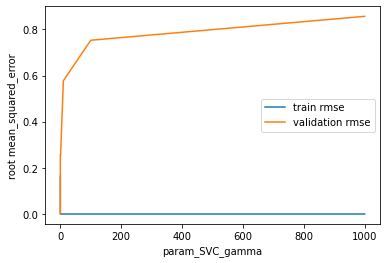

In [56]:
# Optimization by tuning the parameter Gamma:

train_errors = []
valid_errors = []
param_SVC_gamma = [0.00001, 0.0001, 0.001, 0.1, 1,10,100,1000]

for g in param_SVC_gamma:
    svc_rbf = SVC(kernel='rbf', C=1e4, gamma=g)
    y_rbf = svc_rbf.fit(x_train, y_train).predict(x_test)
    
    train_errors.append(np.sqrt(mean_squared_error(y_train, svc_rbf.predict(x_train))))
    valid_errors.append(np.sqrt(mean_squared_error(y_val, svc_rbf.predict(x_val))))
    

plt.xlabel('param_SVC_gamma')
plt.ylabel('root mean_squared_error')
plt.plot(param_SVC_gamma, train_errors, label="train rmse")
plt.plot(param_SVC_gamma, valid_errors, label="validation rmse")
plt.legend()

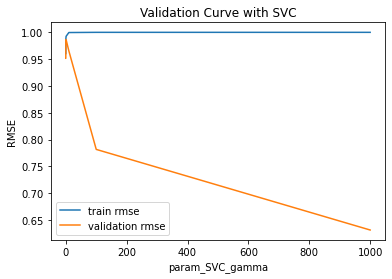

In [57]:
from sklearn.model_selection import validation_curve

train_scores, valid_scores = validation_curve(SVC(), X, y, param_name="gamma", param_range=param_SVC_gamma,
    cv=10, scoring="accuracy", n_jobs=1)

train_scores = np.sqrt(np.abs(train_scores))
valid_scores = np.sqrt(np.abs(valid_scores))

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.title("Validation Curve with SVC")
plt.xlabel("param_SVC_gamma")
plt.ylabel("RMSE")
plt.plot(param_SVC_gamma , train_scores_mean, label="train rmse")
plt.plot(param_SVC_gamma , valid_scores_mean, label="validation rmse")

plt.legend()

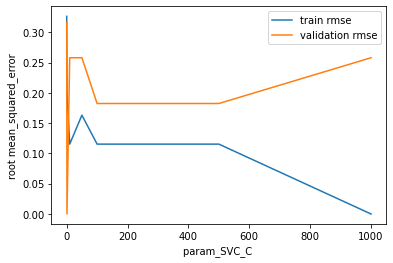

In [58]:
# Optimization by tuning the parameter C:
train_errors = []
valid_errors = []
param_SVC_C = [0.1,1, 10, 50, 100,300,500,1000]

for c in param_SVC_C:
    svc_rbf = SVC(kernel='rbf', C=c, gamma=0.1)
    y_rbf = svc_rbf.fit(x_train, y_train).predict(x_test)
    
    train_errors.append(np.sqrt(mean_squared_error(y_train, svc_rbf.predict(x_train))))
    valid_errors.append(np.sqrt(mean_squared_error(y_val, svc_rbf.predict(x_val))))
    

plt.xlabel('param_SVC_C ')
plt.ylabel('root mean_squared_error')
plt.plot(param_SVC_C, train_errors, label="train rmse")
plt.plot(param_SVC_C, valid_errors, label="validation rmse")
plt.legend()

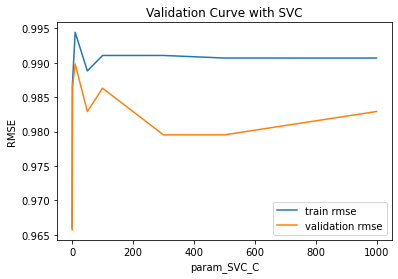

In [59]:
train_scores, valid_scores = validation_curve(SVC(), X, y, param_name="C", param_range=param_SVC_C,
    cv=10, scoring="accuracy", n_jobs=1)

train_scores = np.sqrt(np.abs(train_scores))
valid_scores = np.sqrt(np.abs(valid_scores))

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.title("Validation Curve with SVC")
plt.xlabel("param_SVC_C")
plt.ylabel("RMSE")
plt.plot(param_SVC_C, train_scores_mean, label="train rmse")
plt.plot(param_SVC_C, valid_scores_mean, label="validation rmse")

plt.legend()

In [60]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 50, 100,300,500,1000],
                         'gamma': [0.00001, 0.0001, 0.001, 0.1, 1,10,100,1000],'kernel': ['rbf']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END .....................C=0.1, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.00

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 50, 100, 300, 500, 1000],
                         'gamma': [1e-05, 0.0001, 0.001, 0.1, 1, 10, 100, 1000],
                         'kernel': ['rbf']},
             verbose=2)

In [61]:
print(grid.best_estimator_)

SVC(C=1000, gamma=0.001)


In [62]:
# Let C=1000, gamma=0.1:

svc_rbf = SVC(kernel='rbf', C=1000, gamma=0.1)
y_rbf = svc_rbf.fit(x_train, y_train).predict(x_val)
print("With rbf kernel，R2 score is:", r2_score(y_val, y_rbf),",Mean squared error: %.2f"% mean_squared_error(y_val, y_rbf),',the Variance score: %.2f(best fit = 1)' % r2_score(y_val, y_rbf))
print(confusion_matrix(y_val, y_rbf))
print(classification_report(y_val, y_rbf))

With rbf kernel，R2 score is: 0.9090909090909091 ,Mean squared error: 0.07 ,the Variance score: 0.91(best fit = 1)
[[11  0  0]
 [ 0  8  0]
 [ 0  2  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.80      1.00      0.89         8
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [63]:
# b. Classification model for the IRIS dataset using decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier()
y_clf = clf.fit(x_train, y_train).predict(x_test)

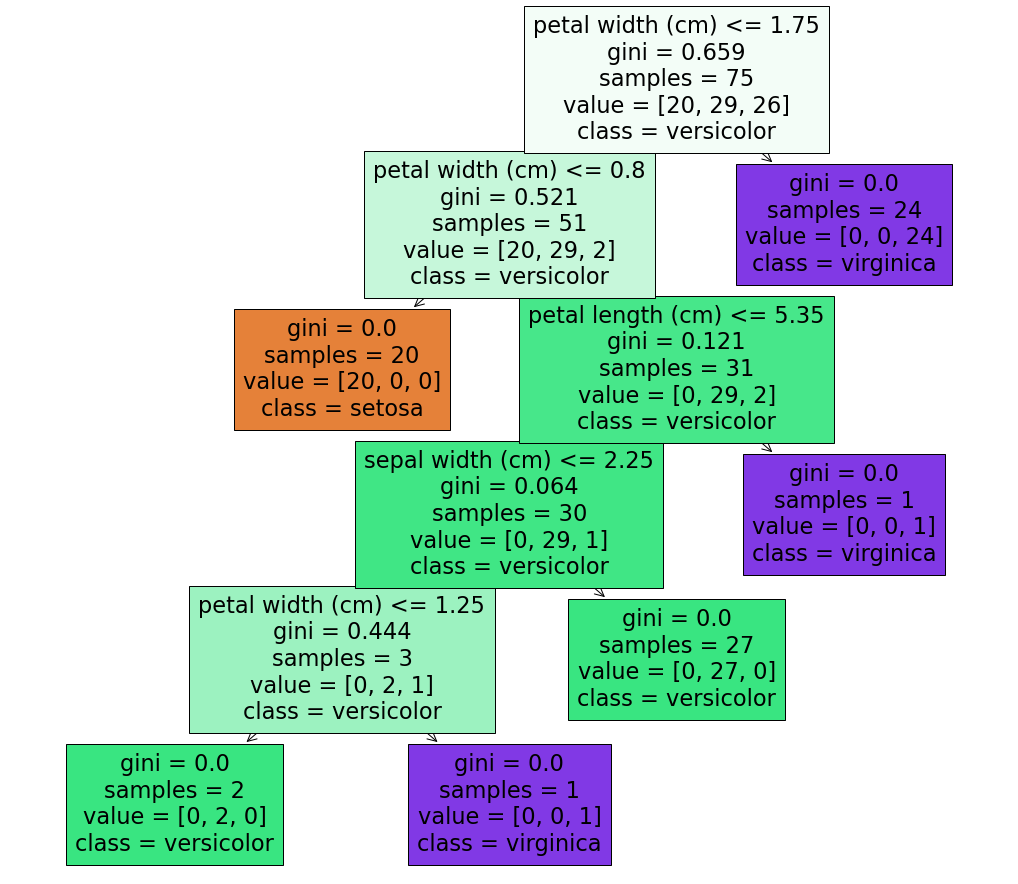

In [64]:
fig_clf = plt.figure(figsize=(18,16))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [65]:
print("With Decision tree classification，R2 score is:", r2_score(y_test, y_clf),",Mean squared error: %.2f"% mean_squared_error(y_test, y_clf),',the Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_clf))

With Decision tree classification，R2 score is: 0.9038461538461539 ,Mean squared error: 0.07 ,the Variance score: 0.90(best fit = 1)


In [66]:
print(confusion_matrix(y_test, y_clf))
print(classification_report(y_test, y_clf))

[[19  0  0]
 [ 0 11  2]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      0.85      0.88        13
           2       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.93      0.93      0.93        45



In [67]:
# Optimization by tuning the parameter:
param_clf = {
        'criterion':['entropy','gini'],
        "max_depth":[2,3,4,5,6],
        "min_samples_split":[2,3,4,5,6],
        "min_samples_leaf":[2,3,4,5,6]
}
grid = GridSearchCV(clf,param_grid=param_clf,
                                     cv=10,verbose=1,n_jobs=1)
grid.fit(x_train,y_train)

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6]},
             verbose=1)

In [68]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [69]:
print(grid.best_score_)

0.9589285714285716


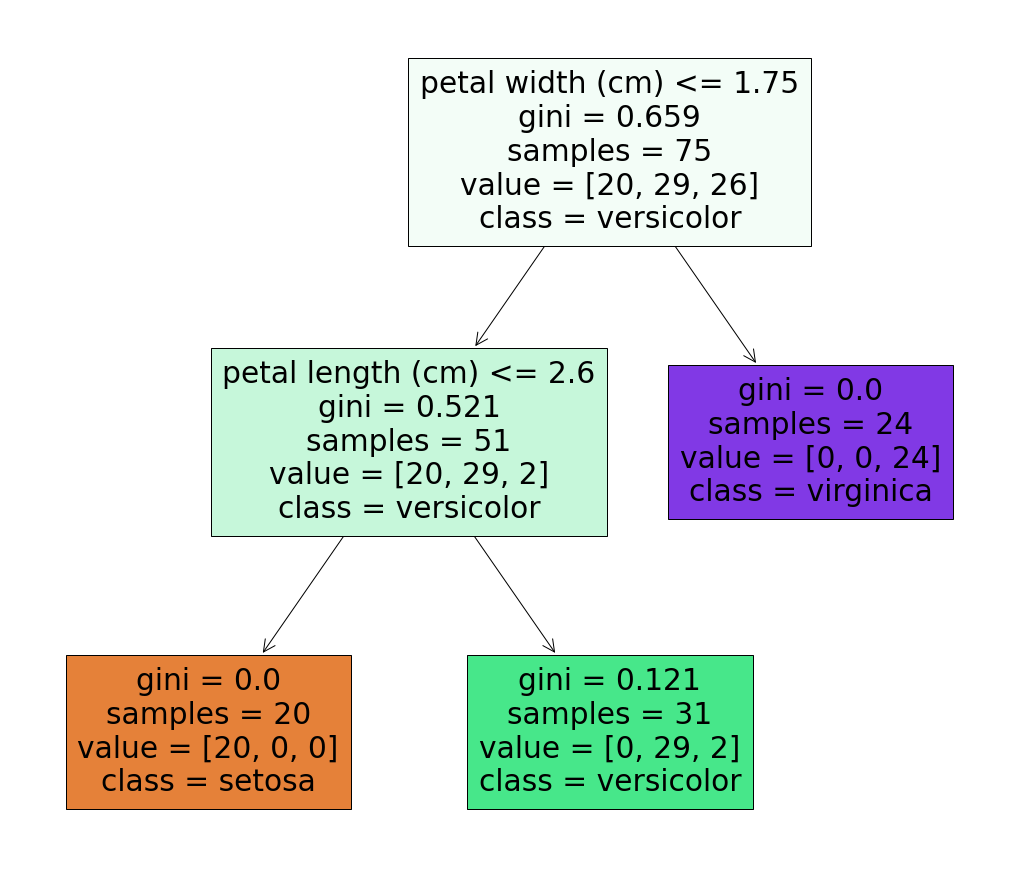

In [70]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_leaf=2,min_samples_split=2)
y_clf = clf.fit(x_train, y_train).predict(x_val)
fig_clf = plt.figure(figsize=(18,16))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [71]:
print("With Decision tree classification，R2 score is:", r2_score(y_val, y_clf),",Mean squared error: %.2f"% mean_squared_error(y_val, y_clf),',the Variance score: %.2f(best fit = 1)' % r2_score(y_val, y_clf))
print(confusion_matrix(y_val, y_clf))
print(classification_report(y_val, y_clf))

With Decision tree classification，R2 score is: 0.9545454545454546 ,Mean squared error: 0.03 ,the Variance score: 0.95(best fit = 1)
[[11  0  0]
 [ 0  8  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.89      1.00      0.94         8
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [72]:
# c. Classification model for the IRIS dataset using Artificial Neural Network (MLP)(use the sigmoid function as an activation)

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,10),activation='logistic',solver='adam')
y_mlp = mlp.fit(x_train, y_train).predict(x_test)

/opt/homebrew/Caskroom/miniconda/base/envs/jnb/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [73]:
print(confusion_matrix(y_test,y_mlp))
print(classification_report(y_test,y_mlp))
print("With ANN method，R2 score is:", r2_score(y_test, y_mlp),",Mean squared error: %.2f"% mean_squared_error(y_test, y_mlp),',the Variance score: %.2f(best fit = 1)' % r2_score(y_test, y_mlp))

[[19  0  0]
 [ 0 13  0]
 [ 0 13  0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.50      1.00      0.67        13
           2       0.00      0.00      0.00        13

    accuracy                           0.71        45
   macro avg       0.50      0.67      0.56        45
weighted avg       0.57      0.71      0.61        45

With ANN method，R2 score is: 0.5833333333333333 ,Mean squared error: 0.29 ,the Variance score: 0.58(best fit = 1)
/opt/homebrew/Caskroom/miniconda/base/envs/jnb/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniconda/base/envs/jnb/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: Undef

In [74]:
# Optimization by tuning the parameter:
param_MLP={
                    "learning_rate":['constant','adaptive'],
                    "hidden_layer_sizes": [(10,),(30,20),(20, 10),(30,20,10)],
                     "solver": ['adam', 'sgd', 'lbfgs'],
                      'activation': ["logistic", "relu", "Tanh"],
}

grid = GridSearchCV(mlp ,param_grid=param_MLP,n_jobs=-1,verbose=2,cv=10)
grid.fit(x_train,y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
/opt/homebrew/Caskroom/miniconda/base/envs/jnb/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.78928571 0.5125     0.93214286 0.65357143 0.45357143 0.91785714
 0.92321429 0.3875     0.95892857 0.96071429 0.3875     0.93035714
 0.77142857 0.3875     0.94464286 0.80178571 0.35892857 0.94285714
 0.80178571 0.3875     0.91607143 0.59642857 0.37321429 0.91607143
 0.71607143 0.91964286 0.91607143 0.53214286 0.87857143 0.94464286
 0.95892857 0.93035714 0.94285714 0.98571429 0.94642857 0.93035714
 0.97321429 0.80535714 0.93035714 0.75       0.87321429 0.89285714
 0.93571429 0.77678571 0.92142857 0.98571429 0.84285714 0.93035714
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan   

GridSearchCV(cv=10,
             estimator=MLPClassifier(activation='logistic',
                                     hidden_layer_sizes=(10, 10)),
             n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu', 'Tanh'],
                         'hidden_layer_sizes': [(10,), (30, 20), (20, 10),
                                                (30, 20, 10)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam', 'sgd', 'lbfgs']},
             verbose=2)

In [75]:
grid.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (30, 20),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [76]:
mlp = MLPClassifier(hidden_layer_sizes=(30,20),activation='logistic',learning_rate='constant',solver='adam')
y_mlp = mlp.fit(x_train, y_train).predict(x_val)

/opt/homebrew/Caskroom/miniconda/base/envs/jnb/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [77]:
print(confusion_matrix(y_val,y_mlp))
print(classification_report(y_val,y_mlp))
print("With ANN method，R2 score is:", r2_score(y_val,y_mlp),",Mean squared error: %.2f"% mean_squared_error(y_val, y_mlp))

[[11  0  0]
 [ 0  8  0]
 [ 0 10  1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.44      1.00      0.62         8
           2       1.00      0.09      0.17        11

    accuracy                           0.67        30
   macro avg       0.81      0.70      0.59        30
weighted avg       0.85      0.67      0.59        30

With ANN method，R2 score is: 0.5454545454545454 ,Mean squared error: 0.33


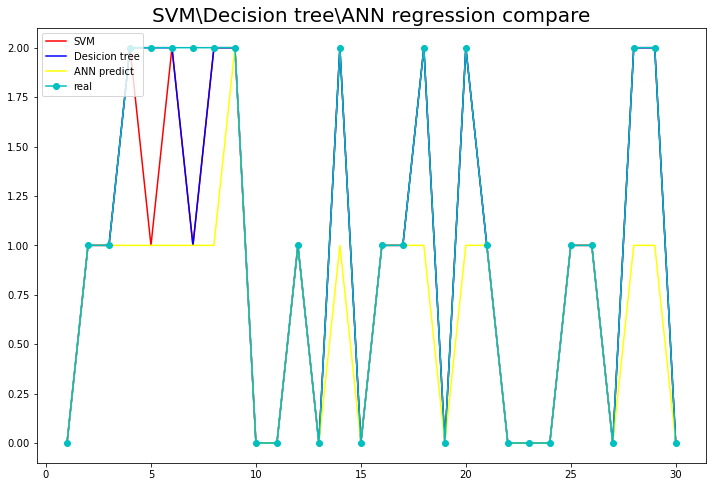

In [78]:
plt.figure(figsize=(12,8))
x_s = np.arange(1,len(x_val) + 1)
plt.plot(x_s, y_rbf,color='red', label="SVM")
plt.plot(x_s, y_clf, color='blue',label="Desicion tree")
plt.plot(x_s, y_mlp,color='yellow',label="ANN predict")
plt.plot(x_s, y_val, 'co-', label="real")
plt.title('SVM\Decision tree\ANN regression compare', fontsize=20)
plt.legend()

In [79]:

svm_star = svc_rbf.fit(x_train, y_train)
dt_star = clf.fit(x_train, y_train)
mlp_star = mlp.fit(x_train, y_train)


/opt/homebrew/Caskroom/miniconda/base/envs/jnb/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [80]:
# step of the grid
h =.02

# to create the grid , so that we can plot the images on it
x_min, x_max = x_train[:,0].min()-1, x_train[:,0].max() +1
y_min, y_max = x_train[:,1].min()-1, x_train[:,1].max() +1 # since here it applies the array of sepal features. 

xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h)) # meshigrid let's rock

In [81]:
# the title of the graph
titles = ['LinearSVC(linear kernel',
                'SVC with RBF kernel',
                'SVC with polynomial degree 3 kernel']
                

for i, star in enumerate((svm_star,dt_star,mlp_star)):
        # to plot the edge of different classes
        #  to create a 2*2 grid , and set the i image as current image
        plt.subplot(2,2,i+1)
        #set the margin between different subplot
        plt.subplots_adjust(wspace=0.4,hspace=0.4)

        #svm input :xx and yyout put an array

        Z = star.predict(np.c_[xx.ravel(), yy.ravel()])
        #feel this body

        #  plot the result
        Z = Z.reshape(xx.shape) #!!!!  (220, 280 why?????)
        plt.contourf(xx,yy,Z, cmap=plt.cm.Paired)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])

plt.figure(figsize=(16,12))

ValueError: X.shape[1] = 2 should be equal to 4, the number of features at training time